In [2]:
import pandas as pd
titanic = pd.read_csv('datasets/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3.3 이상값 처리

### 3.3.2 이상값 시각화 하기

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\WhoLook\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Fare'>

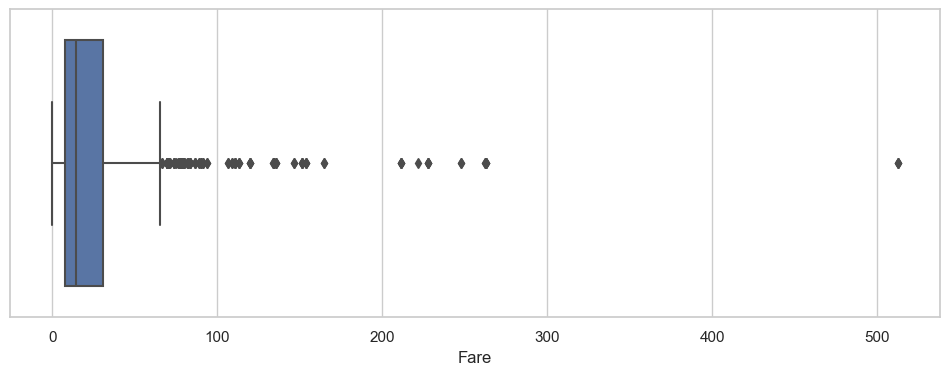

In [5]:
# Fare 변수를 대상으로 이상값 확인
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
sns.boxplot(x=titanic.Fare)

C:\Users\WhoLook\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age'>

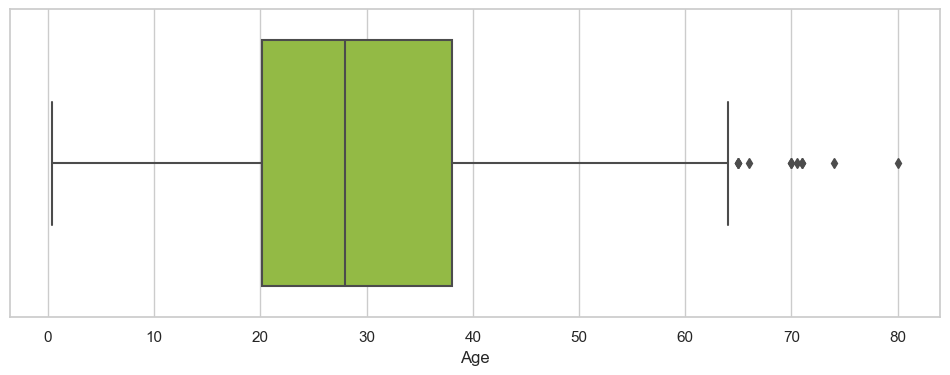

In [9]:
# Age 이상값 확인
plt.figure(figsize=(12,4))
sns.boxplot(x=titanic.Age, color="yellowgreen")

### 3.3.3 IQR 기법으로 이상값 확인하기

In [11]:
def outlier_iqr(data, column):
    global lower, upper
    q1, q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q3 - q1
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    print("IQR = ", iqr)
    print("lower = ", lower)
    print("upper = ", upper)
    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]
    return print("총 이상값 개수", data1.shape[0] + data2.shape[0])

In [12]:
outlier_iqr(titanic, 'Fare')

IQR =  23.0896
lower =  -26.724
upper =  65.6344
총 이상값 개수 116


C:\Users\WhoLook\AppData\Local\Temp\ipykernel_8436\3593301608.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.Fare, bins=50, kde=False)


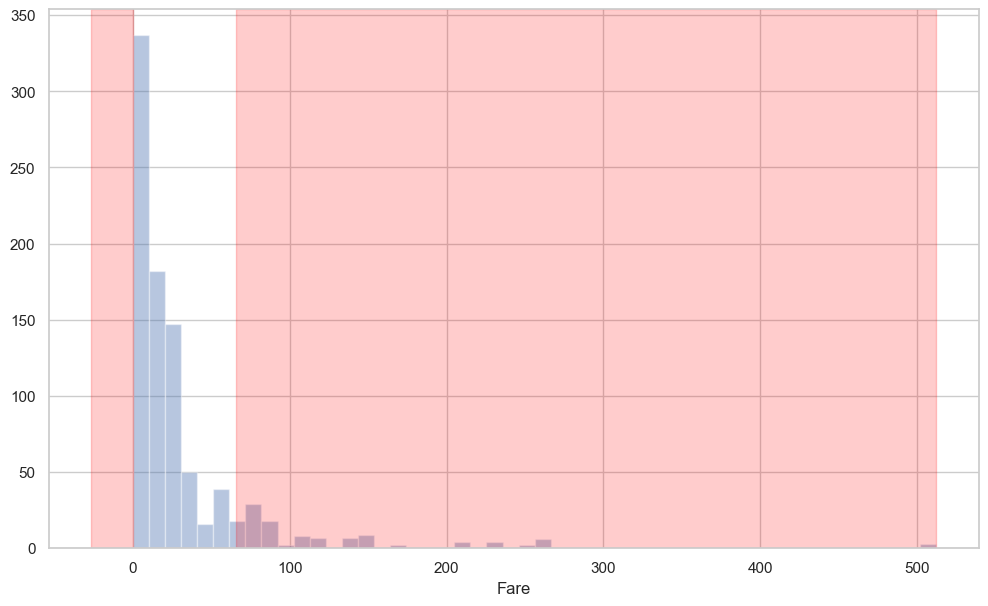

In [13]:
plt.figure(figsize=(12, 7))
sns.distplot(titanic.Fare, bins=50, kde=False)

plt.axvspan(xmin=lower, xmax=titanic.Fare.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=titanic.Fare.max(), alpha=0.2, color='red')
plt.show()